In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [51]:
df = pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


In [53]:
le_gender = LabelEncoder()
le_geo = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])       # Male=1, Female=0
df['Geography'] = le_geo.fit_transform(df['Geography'])    # France=0, Germany=1, Spain=2

In [54]:
df['Gender'] 

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [55]:
df['Geography'] 

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64

In [56]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [59]:
print(df['Exited'].value_counts())
print(df['Exited'].value_counts(normalize=True))

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


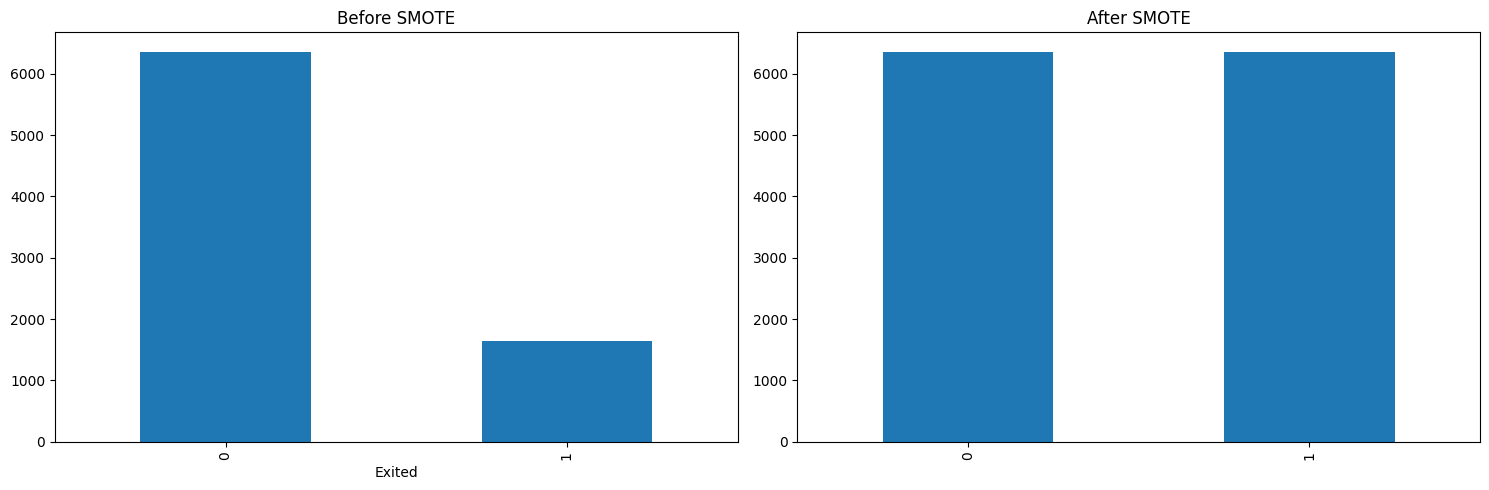

In [60]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.to_numpy())


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5)) # Effect of SMOTE over imbalanced datasets

ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.tight_layout()
plt.show()

In [61]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

algorithms = [
    ("Random Forest", RandomForestClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),]

results = {}


In [62]:
for algo_name, algo in algorithms:
    algo.fit(X_train, y_train)
    predictions = algo.predict(X_test)
    # print(predictions[:10])
    accuracy = accuracy_score(y_test, predictions)
    results[algo_name] = accuracy

for algo_name, accuracy in results.items():
    print(f"\n=== {algo_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions, zero_division=0))  


=== Random Forest ===
Accuracy: 0.8665
Confusion Matrix:
[[1559   48]
 [ 321   72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000


=== Logistic Regression ===
Accuracy: 0.8155
Confusion Matrix:
[[1559   48]
 [ 321   72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [63]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

predictions = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions, zero_division=0))


Accuracy: 0.8660
Confusion Matrix:
[[1547   60]
 [ 208  185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [64]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

for i in range(51):
    sample = X_test[i].reshape(1, -1)  # Ensure sample is 2D
    prediction = model.predict(sample)
    print(f"Sample {i}: Predicted class label:", "✅ Customer will STAY" if prediction[0] == 0 else "⚠️ Customer will CHURN")


Sample 0: Predicted class label: ✅ Customer will STAY
Sample 1: Predicted class label: ✅ Customer will STAY
Sample 2: Predicted class label: ✅ Customer will STAY
Sample 3: Predicted class label: ✅ Customer will STAY
Sample 4: Predicted class label: ✅ Customer will STAY
Sample 5: Predicted class label: ✅ Customer will STAY
Sample 6: Predicted class label: ✅ Customer will STAY
Sample 7: Predicted class label: ✅ Customer will STAY
Sample 8: Predicted class label: ✅ Customer will STAY
Sample 9: Predicted class label: ✅ Customer will STAY
Sample 10: Predicted class label: ⚠️ Customer will CHURN
Sample 11: Predicted class label: ⚠️ Customer will CHURN
Sample 12: Predicted class label: ⚠️ Customer will CHURN
Sample 13: Predicted class label: ✅ Customer will STAY
Sample 14: Predicted class label: ✅ Customer will STAY
Sample 15: Predicted class label: ✅ Customer will STAY
Sample 16: Predicted class label: ✅ Customer will STAY
Sample 17: Predicted class label: ✅ Customer will STAY
Sample 18: Pre